# Density: experimental data

## Create mega dataframe with all the clean density values and save as csv

In [3]:
#05/11/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

# mega_df
pressure =[]
temperature = []
density =[]

pressure_error =[]
temperature_error = []
density_error = []

paper =[]

#create mega dataframe
for key in all_papers.keys():
    path = all_papers[key][2]
    data = pd.read_excel(path)

    pressure += list(data["P_SI"])
    temperature += list(data["T_SI"])
    density += list(data["rho_SI"])

    pressure_error += list(data["delta_P"])
    temperature_error += list(data["delta_T"])
    density_error += list(data["delta_rho"])

    paper += [key]*(data.index[-1]+1)

df = pd.DataFrame(data = {"paper": paper,
                          "P": pressure,
                          "T": temperature,
                          "rho": density,
                          "delta_P": pressure_error,
                          "delta_T": temperature_error,
                          "delta_rho": density_error}
)


# save dataframe
df.to_csv("dataframes/experimental_data_density/ammonia_density.csv", index=False)



## Scatter plot of data per paper

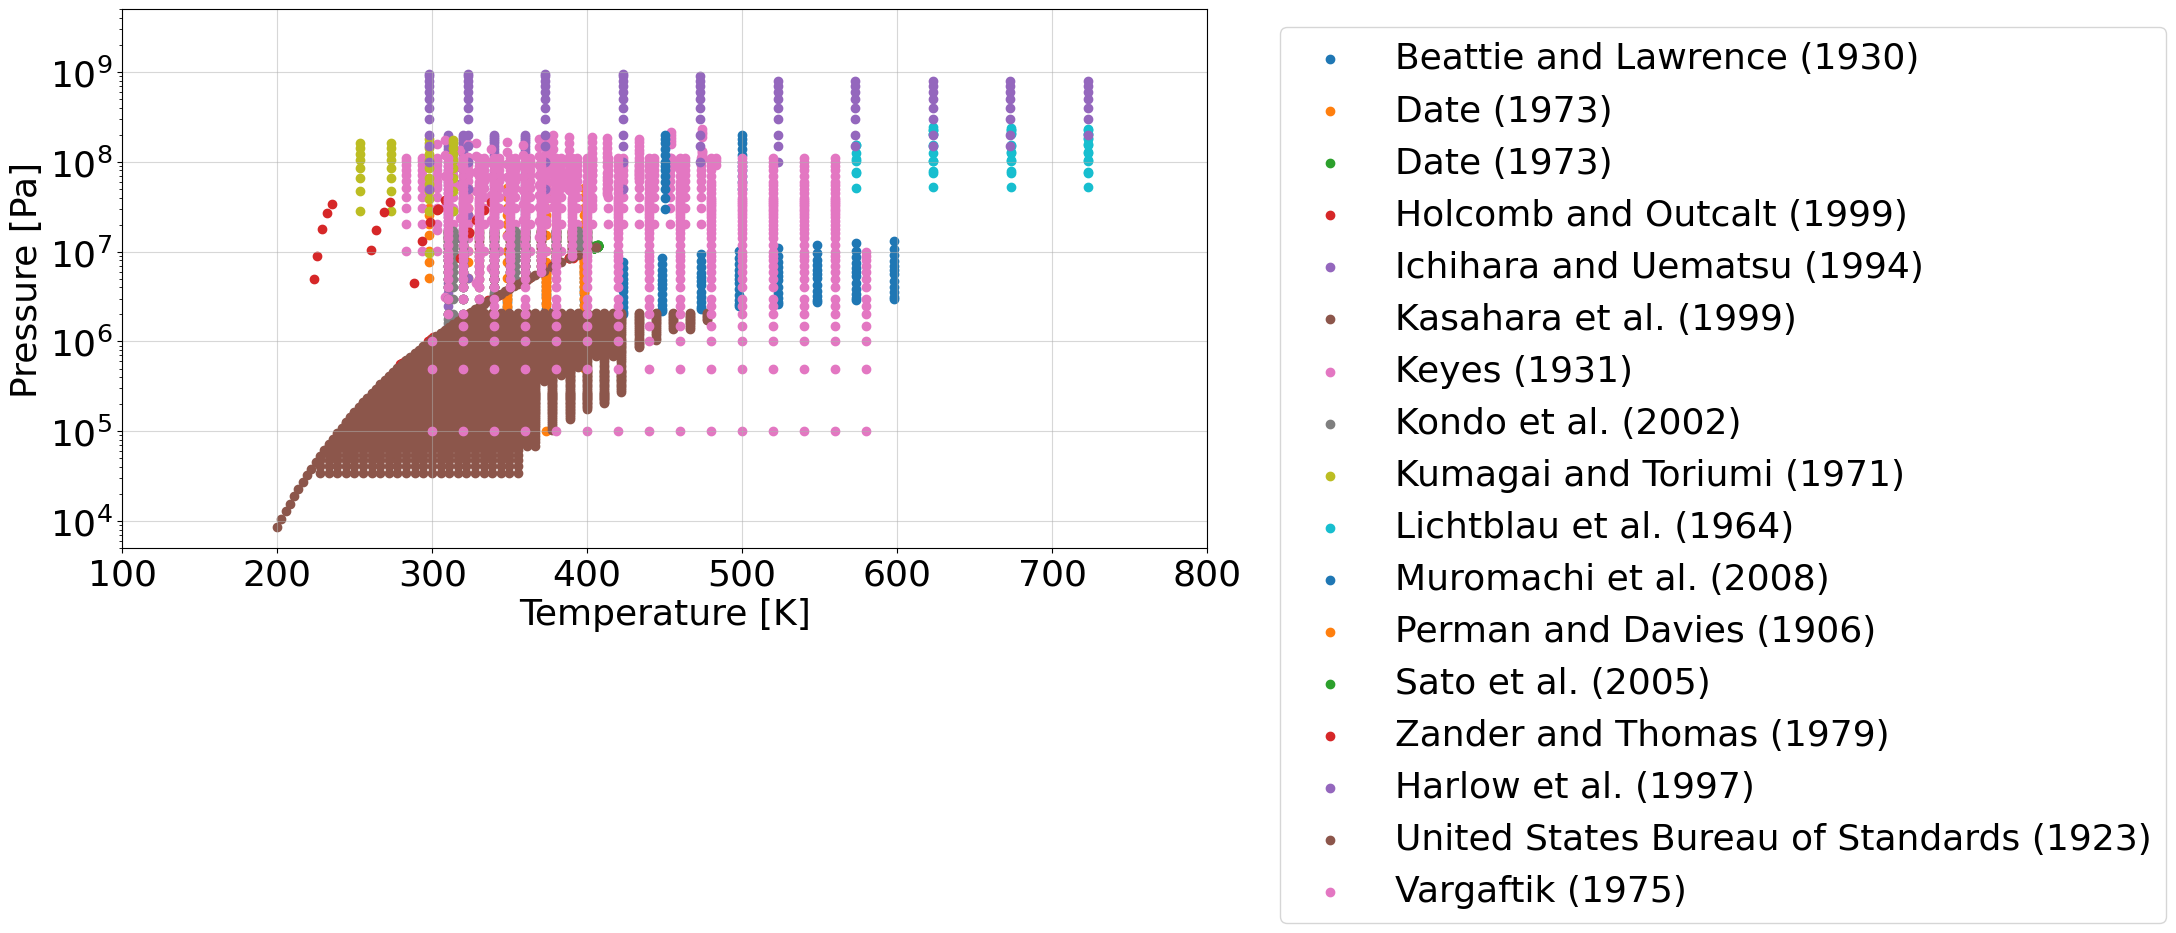

In [ ]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

df = pd.read_csv("dataframes/experimental_data_density/ammonia_density.csv")

fig, ax = plt.subplots()

for paper in df["paper"].unique():
    data = df[df["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    


## Separate data into supercritical, superheated and subcooled regions

C:\Users\catar\AppData\Local\Temp\ipykernel_16364\124881268.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_supercritical = df[df["T"]>NH3.T_c][df["P"]>NH3.P_c]


[338.85422626 341.09978308 346.17620642 ... 405.6        405.6
 405.6       ]


C:\Users\catar\AppData\Local\Temp\ipykernel_16364\124881268.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_superheated = df[df["P"]<NH3.P_c][df["T"]>T_interpolated]
C:\Users\catar\AppData\Local\Temp\ipykernel_16364\124881268.py:83: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subcooled = df[df["T"]<NH3.T_c][df["P"]>P_interpolated]


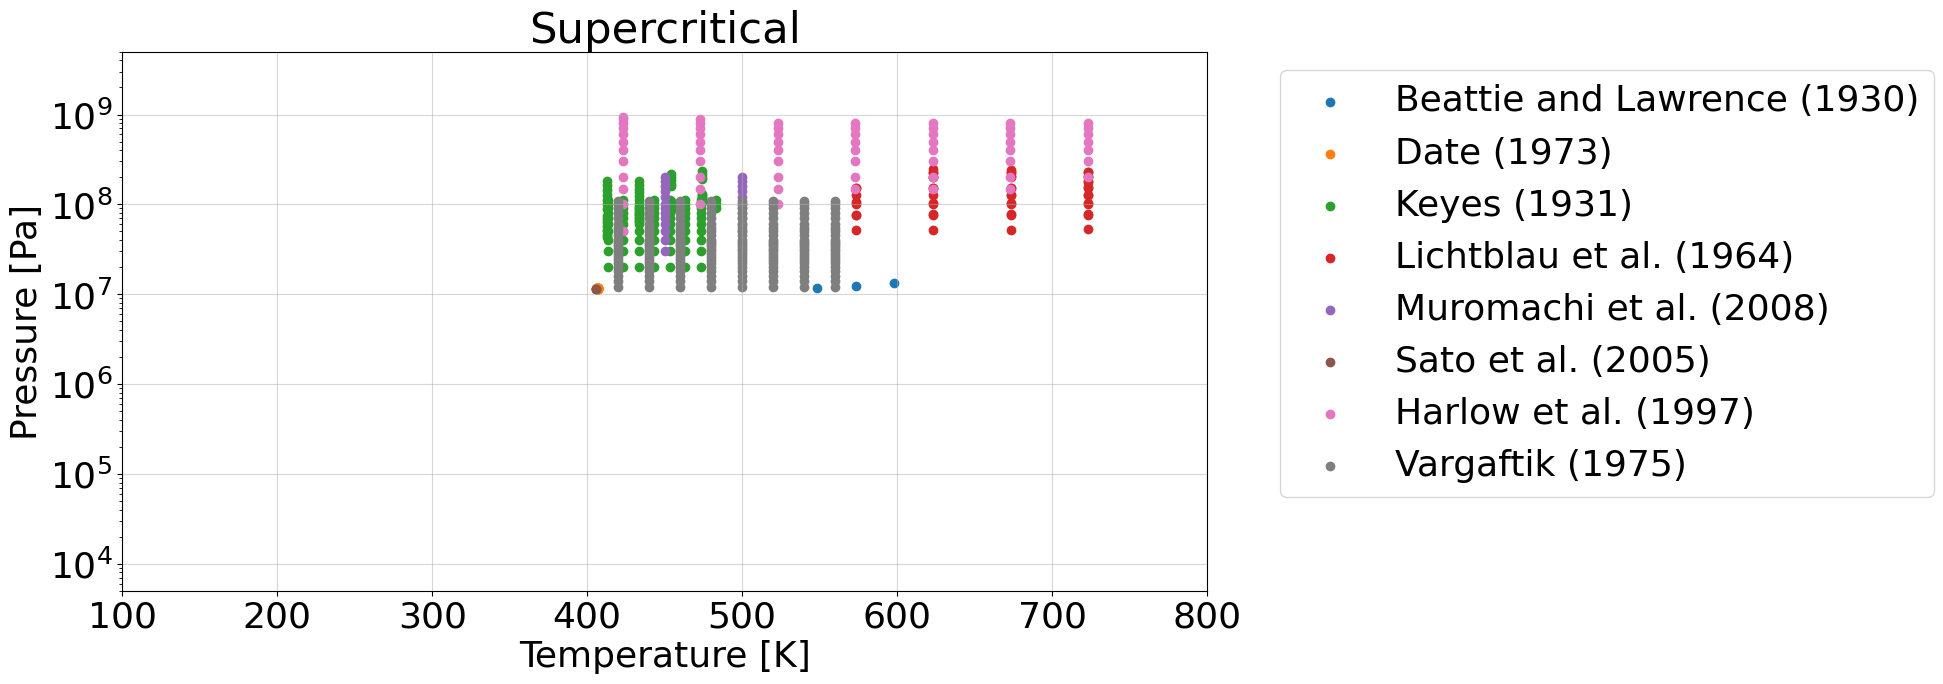

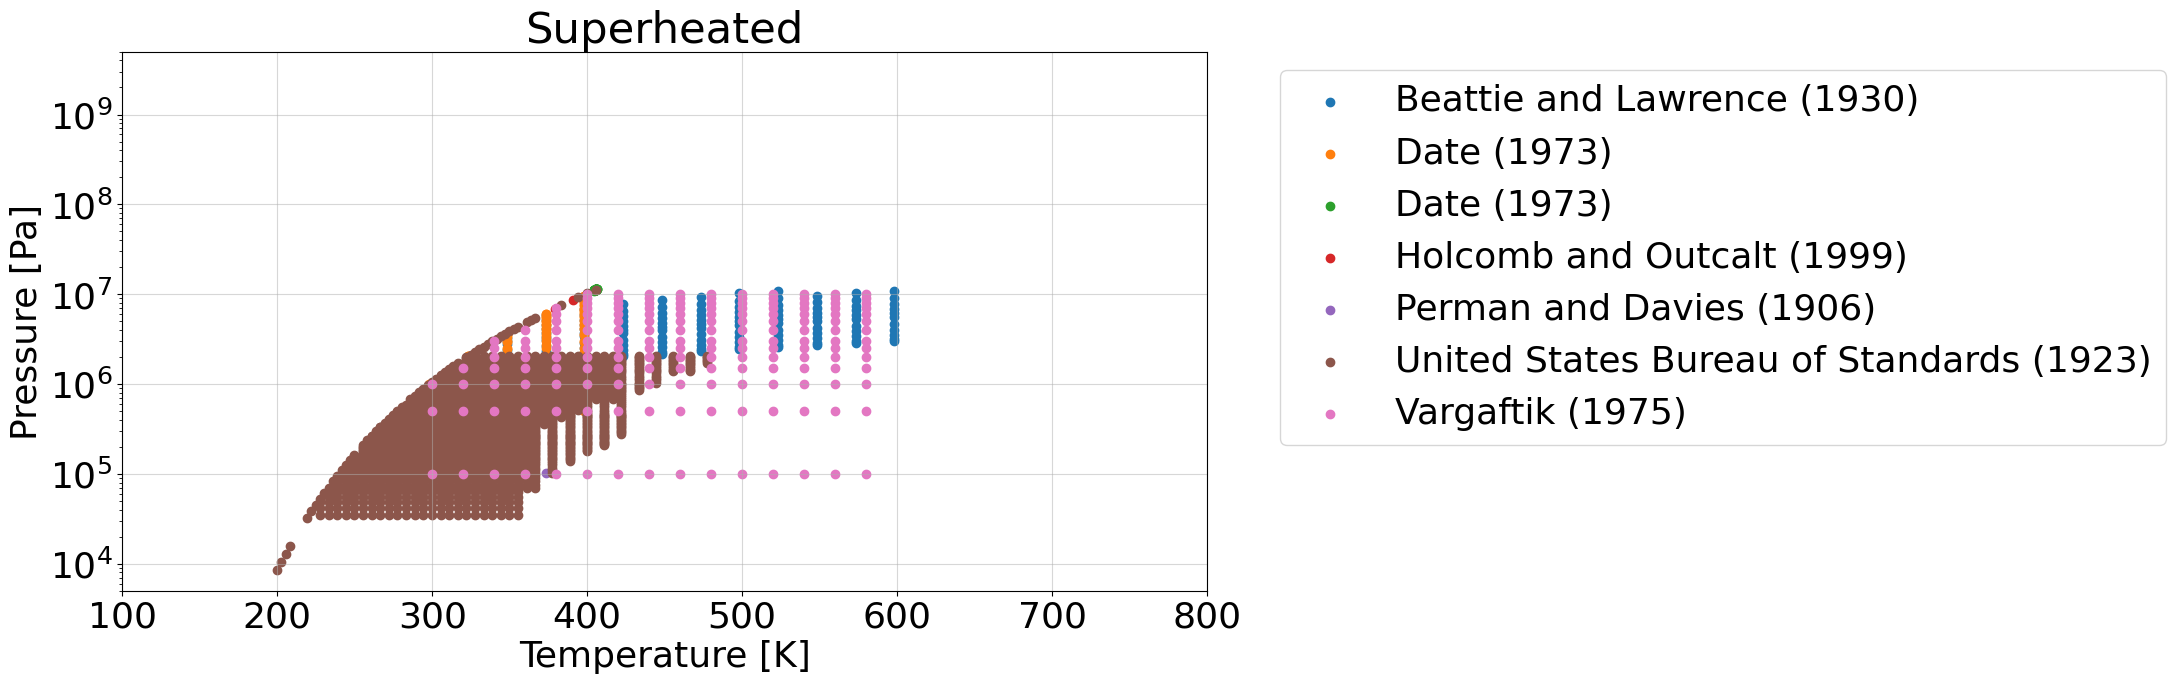

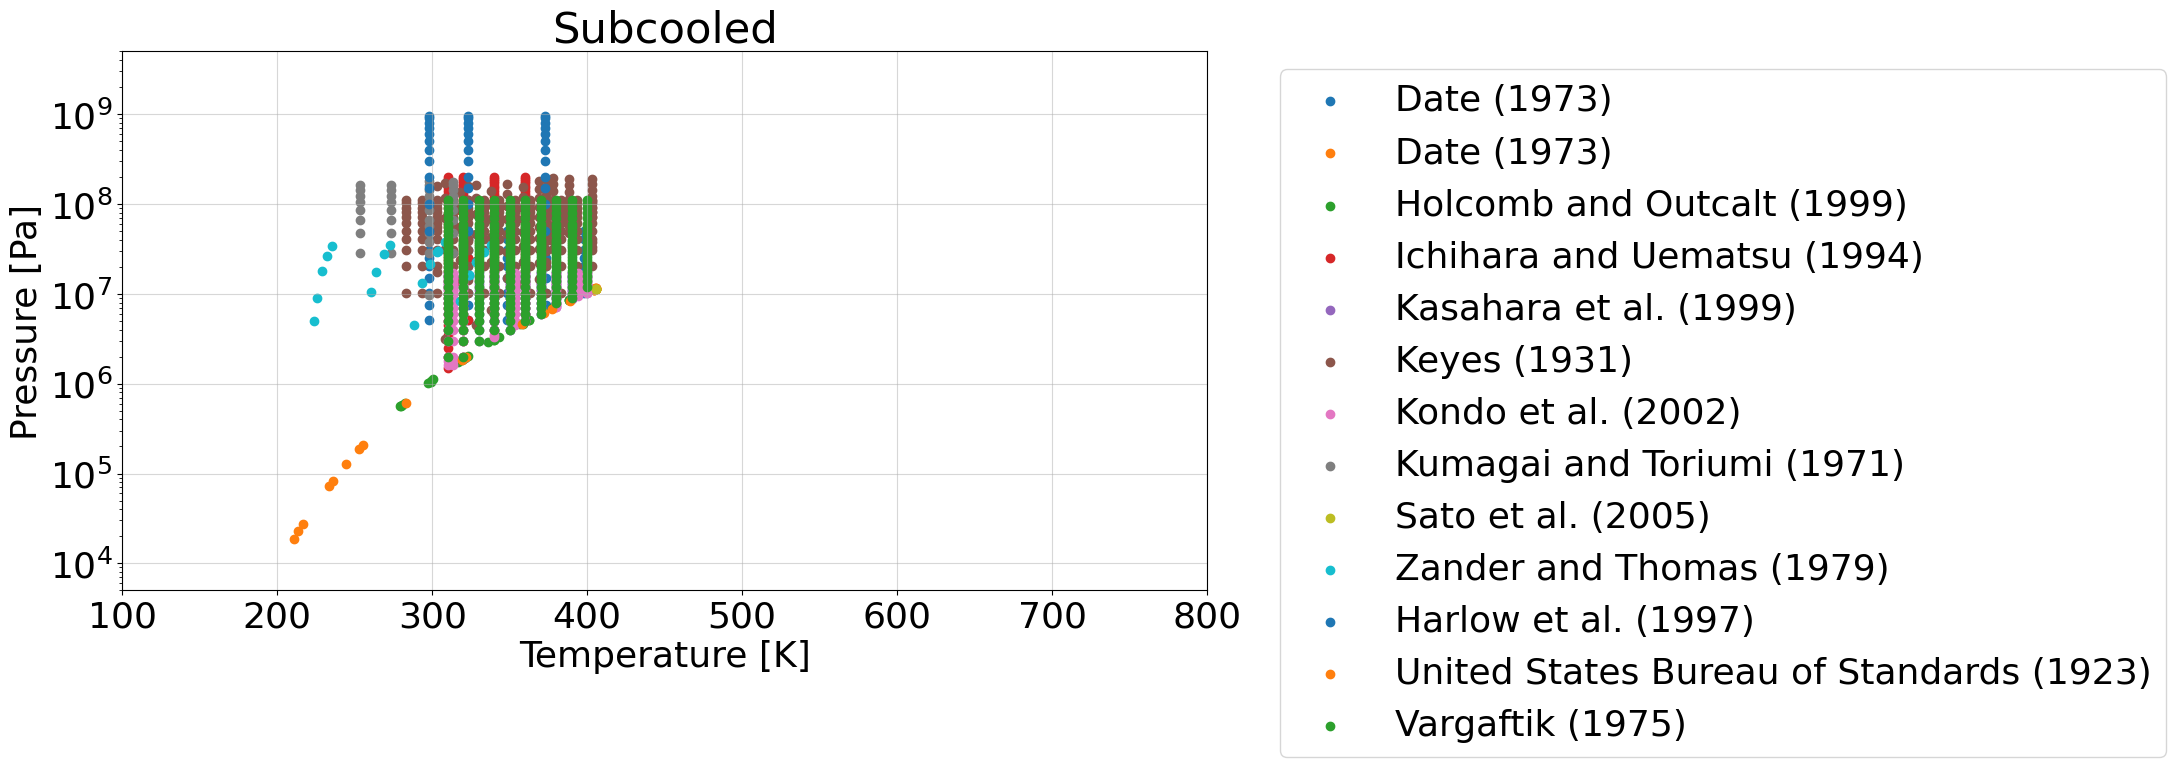

In [28]:
# 05/11/2025
import pandas as pd
from purefluid import NH3
import numpy as np
import matplotlib.pyplot as plt

# ================================================ papers
def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}
# ================================================ data
# density data
df = pd.read_csv("dataframes/experimental_data_density/ammonia_density.csv")

# saturation data
df_saturation = pd.read_csv("dataframes/experimental_data_saturation/ammonia_saturation.csv")

# ================================================ supercritical
df_supercritical = df[df["T"]>NH3.T_c][df["P"]>NH3.P_c]

fig, ax = plt.subplots()

for paper in df_supercritical["paper"].unique():
    data = df_supercritical[df_supercritical["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", 
       ylabel="Pressure [Pa]", xlabel="Temperature [K]", title="Supercritical",
       xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1)) 


# ================================================ superheated
# order saturation data by T
df_saturation = df_saturation.sort_values(by="T")

# linearly interpolate saturation line for temperature at density pressure
T_interpolated = np.interp(df["P"], df_saturation["P"], df_saturation["T"])
print(T_interpolated)
df_superheated = df[df["P"]<NH3.P_c][df["T"]>T_interpolated]


fig, ax = plt.subplots()

for paper in df_superheated["paper"].unique():
    data = df_superheated[df_superheated["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", 
       ylabel="Pressure [Pa]", xlabel="Temperature [K]", title="Superheated",
       xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1)) 


# ================================================ subcooled
# order saturation data by P
df_saturation = df_saturation.sort_values(by="P")

# lineally interpolate saturation line for pressure at density temperature
P_interpolated = np.interp(df["T"], df_saturation["T"], df_saturation["P"])
df_subcooled = df[df["T"]<NH3.T_c][df["P"]>P_interpolated]

# plotting
fig, ax = plt.subplots()

for paper in df_subcooled["paper"].unique():
    data = df_subcooled[df_subcooled["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", 
       ylabel="Pressure [Pa]", xlabel="Temperature [K]", title="Subcooled",
       xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))

# Saturation: experimental data

## Create mega dataframe of saturation data

In [ ]:
#05/11/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

def paper_path(paper_number):
    return f"dataframes/experimental_data_saturation/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    376: ["Vargaftik", 1975, paper_path(376)],
    385: ["Baehre et al.", 1976, paper_path(385)],
    386: ["Burrell and Robertson", 1915, paper_path(386)],
    388: ["Calado et al.", 1992, paper_path(388)],
    389: ["Cragoe et al.", 1919, paper_path(389)]
}

# mega_df
pressure =[]
temperature = []
density_v =[]
density_l = []

pressure_error =[]
temperature_error = []
density_error = []

paper =[]

#create mega dataframe
for key in all_papers.keys():
    print(key)
    path = all_papers[key][2]
    data = pd.read_excel(path)

    pressure += list(data["P_SI"])
    temperature += list(data["T_SI"])
    density_v += list(data["rho_v_SI"])
    density_l += list(data["rho_l_SI"])

    pressure_error += list(data["delta_P"])
    temperature_error += list(data["delta_T"])
    density_error += list(data["delta_rho"])

    paper += [key]*(data.index[-1]+1)

df = pd.DataFrame(data = {"paper": paper,
                          "P": pressure,
                          "T": temperature,
                          "rho_v": density_v,
                          "rho_l": density_l,
                          "delta_P": pressure_error,
                          "delta_T": temperature_error,
                          "delta_rho": density_error}
)


# save dataframe
# df.to_csv("dataframes/experimental_data_saturation/ammonia_saturation.csv")



357
358
359
376
385
386
388
389


## Visualising experimental data from specific papers

points = 150
pressure range = [0.06, 33.12] bar
temperature range = [194.70, 343.16] K


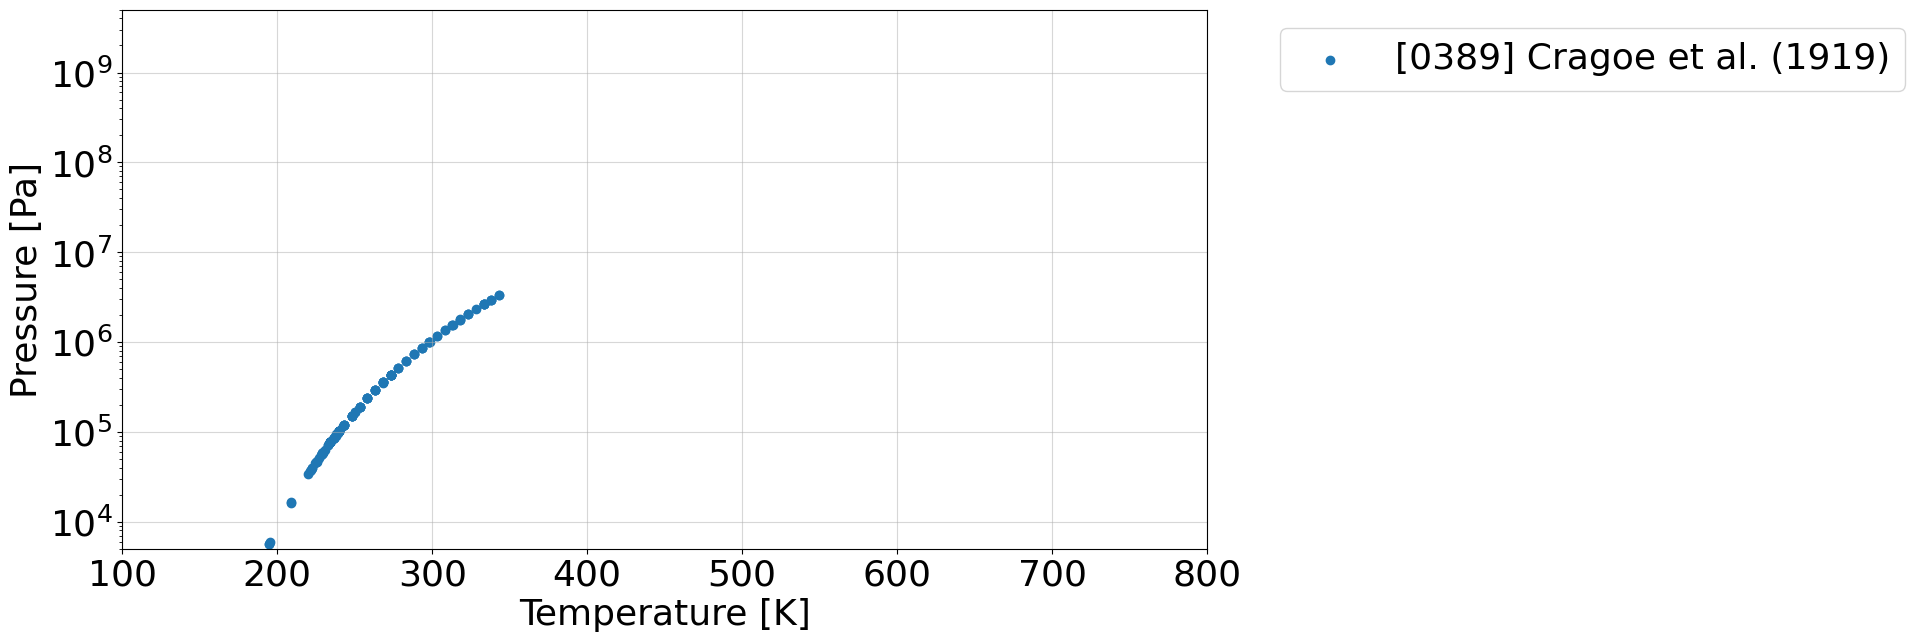

In [16]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

def paper_path(paper_number):
    return f"dataframes/experimental_data_saturation/0{str(paper_number)}.xlsx"


#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    376: ["Vargaftik", 1975, paper_path(376)],
    385: ["Baehre et al.", 1976, paper_path(385)],
    386: ["Burrell and Robertson", 1915, paper_path(386)],
    388: ["Calado et al.", 1992, paper_path(388)],
    389: ["Cragoe et al.", 1919, paper_path(389)]
}

# choose the paper
paper = 389

# the data
data = pd.read_excel(f"dataframes/experimental_data_saturation/0{str(paper)}.xlsx")

# data ranges
print(f"points = {data.index[-1]+1}")
print(f"pressure range = [{min(data['P_SI']/1e5):.2f}, {max(data['P_SI']/1e5):.2f}] bar")
print(f"temperature range = [{min(data['T_SI']):.2f}, {max(data['T_SI']):.2f}] K")


fig, ax = plt.subplots()


ax.scatter(data["T_SI"], data["P_SI"], label =  f"[0{paper}] " + all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    


## All saturation data coloured by paper

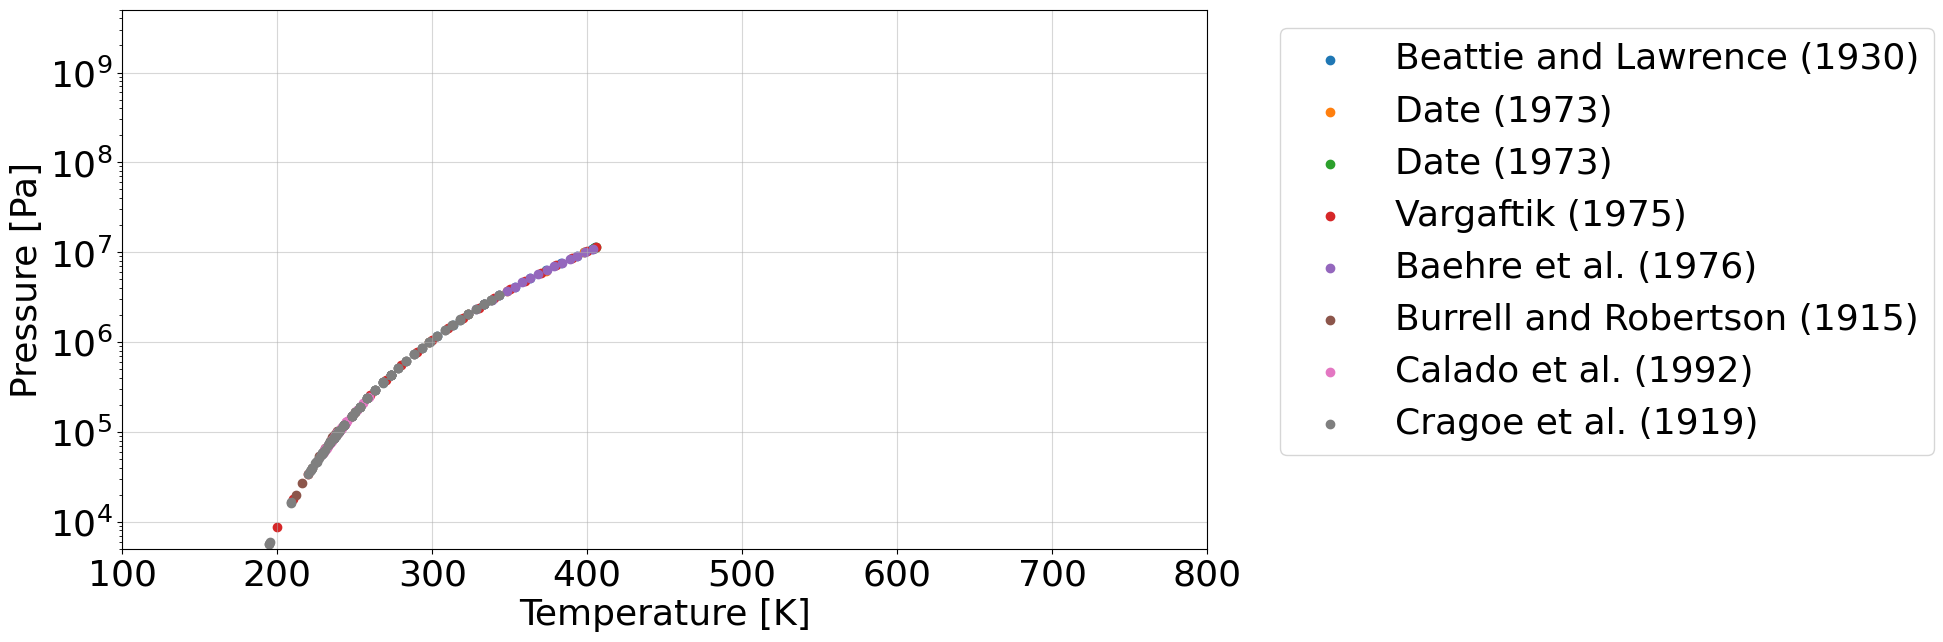

In [21]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    376: ["Vargaftik", 1975, paper_path(376)],
    385: ["Baehre et al.", 1976, paper_path(385)],
    386: ["Burrell and Robertson", 1915, paper_path(386)],
    388: ["Calado et al.", 1992, paper_path(388)],
    389: ["Cragoe et al.", 1919, paper_path(389)]
}

df = pd.read_csv("dataframes/experimental_data_saturation/ammonia_saturation.csv")

fig, ax = plt.subplots()

for paper in df["paper"].unique():
    data = df[df["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    


# Density: calculations from EOS

In [1]:
# 07/11/2025
import pandas as pd
from purefluid import NH3
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# import the multi_root function
from other_functions import multi_root, choose_root

# import the presets
from presets_EOS_purefluid import \
    NH3_vdW, NH3_PR, NH3_RK, NH3_MSRK, \
    NH3_0290, NH3_0298, NH3_0300,\
    NH3_0323, NH3_0324, NH3_0328, NH3_0330 

# ================================================ helpful functions
# identify phase and choose root accordingly
def identify_phase(pressure, temperature, fluid, df_saturation):
    # order saturation data by P
    df_saturation = df_saturation.sort_values(by="P")

    # linearly interpolate saturation line for temperature at density pressure
    T_saturation = np.interp(pressure, df_saturation["P"], df_saturation["T"])

    if temperature > T_saturation and pressure < fluid.P_c:
        phase = "superheated"
    
    elif temperature > fluid.T_c and pressure > fluid.P_c:
        phase = "supercritical"
    else:
        phase = "subcooled"

    return phase

def choose_root(roots, phase):
    if len(roots) == 0:
        return np.nan
    if phase == "superheated" or phase == "supercritical":
        # choose the lowest root
        return roots[0]
    elif phase == "subcooled":
        # choose the highest root
        return roots[-1]
    else:
        raise ValueError("Phase not recognized")

# ================================= data
df = pd.read_csv("dataframes/experimental_data_density/ammonia_density.csv")

df_saturation = pd.read_csv("dataframes/experimental_data_saturation/ammonia_saturation.csv")

# ================================= calculate densities using each EOS
eos_list = [NH3_vdW, NH3_PR, NH3_RK, NH3_MSRK,
            NH3_0290, NH3_0298, NH3_0300,
            NH3_0323, NH3_0324, NH3_0328, NH3_0330]

# phases loop
phases =[]
for index, row in tqdm(df.iterrows()):
    rho_calculated = []
    P = row["P"]
    T = row["T"]

    phase = identify_phase(P, T, NH3, df_saturation)
    phases += [phase]

pressures = np.array(df["P"])
temperatures = np.array(df["T"])

for eos in eos_list:
    rho_calculated = []
    for i in tqdm(df.index):
        pressure = pressures[i]
        temperature = temperatures[i]

        density_roots = multi_root(eos.pressure_equation, [0, 5], args=(pressure, temperature), n=2e3)
        
        density = choose_root(density_roots, phases[index])

        rho_calculated.append(density*NH3.M)    # convert from molar density to mass density

        # add calculated densities to dataframe
    df[f"{eos.name}"] = rho_calculated

    # save dataframe
    df.to_csv("dataframes/ammonia_density_EOS.csv", index=False)

association scheme 2B was selected
association scheme 4B was selected
association scheme 3B was selected
association scheme 4C was selected


4234it [00:03, 1266.68it/s]
  0%|          | 0/4234 [00:00<?, ?it/s]<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in log
  return P - 8.31446261815324*T*rho*(rho*(-5.9222248359399*T**(-2.0)*rho*(2.76827064590464e-15*rho**2 - 2.68227756762784e-10*rho - 7.40101708100397e-6)/((1 - 1.07108141061738e-5*rho)**2*(0.00574781212822397*T**(-1.0)*rho*(1 - 1.07108141061738e-5*rho)**2*(-4.87831386636589e-11*rho**2 + 1.27601062321411e-5*rho + 1)/((8.39372944290903e-11*rho**2 - 1.20805545808671e-5*rho + 1)*(9.22756881968214e-16*rho**3 - 1.34113878381392e-10*rho**2 - 7.40101708100397e-6*rho + 1)) + 1)) - 5.9222248359399*T**(-2.0)*rho*(9.22756881968214e-16*rho**3 - 1.34113878381392e-10*rho**2 - 7.40101708100397e-6*rho + 1)*(-0.00574781212822397*T**(-1.0)*rho*(1.20805545808671e-5 - 1.67874588858181e-10*rho)*(1 - 1.07108141061738e-5*rho)**2*(-4.87831386636589e-11*rho**2 + 1.27601062321411e-5*rho + 1)/((8.39372944290903e-11*rho**2 - 1.20805545808671e-5*rho + 1)**2*(9.22756881968214e-

## Making sure the nan values aren't due to insufficient points in the root finding

In [ ]:
# 07/11/2025
import pandas as pd
from purefluid import NH3
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# import the multi_root function
from other_functions import multi_root, choose_root

# import the presets
from presets_EOS_purefluid import \
    NH3_vdW, NH3_PR, NH3_RK, NH3_MSRK, \
    NH3_0290, NH3_0298, NH3_0300,\
    NH3_0323, NH3_0324, NH3_0328, NH3_0330 

# ================================================ helpful functions
# identify phase and choose root accordingly
def identify_phase(pressure, temperature, fluid, df_saturation):
    # order saturation data by P
    df_saturation = df_saturation.sort_values(by="P")

    # linearly interpolate saturation line for temperature at density pressure
    T_saturation = np.interp(pressure, df_saturation["P"], df_saturation["T"])

    if temperature > T_saturation and pressure < fluid.P_c:
        phase = "superheated"
    
    elif temperature > fluid.T_c and pressure > fluid.P_c:
        phase = "supercritical"
    else:
        phase = "subcooled"

    return phase

def choose_root(roots, phase):
    if len(roots) == 0:
        return np.nan
    if phase == "superheated" or phase == "supercritical":
        # choose the lowest root
        return roots[0]
    elif phase == "subcooled":
        # choose the highest root
        return roots[-1]
    else:
        raise ValueError("Phase not recognized")

# ================================= data
df = pd.read_csv("dataframes/ammonia_density_EOS.csv")

df_saturation = pd.read_csv("dataframes/experimental_data_saturation/ammonia_saturation.csv")

# ================================= calculate densities using each EOS
eos_list = [NH3_vdW, NH3_PR, NH3_RK, NH3_MSRK,
            NH3_0290, NH3_0298, NH3_0300,
            NH3_0323, NH3_0324, NH3_0328, NH3_0330]

# phases loop
phases =[]
for index, row in tqdm(df.iterrows()):
    rho_calculated = []
    P = row["P"]
    T = row["T"]

    phase = identify_phase(P, T, NH3, df_saturation)
    phases += [phase]

pressures = np.array(df["P"])
temperatures = np.array(df["T"])

empty_cells = df.isnull()

for j, eos in enumerate(eos_list):
    for i in tqdm(df.index):
        if empty_cells.iloc[i, j+7]:   # if not calculated
            
            pressure = pressures[i]
            temperature = temperatures[i]

            density_roots = multi_root(eos.pressure_equation, [0, 5], args=(pressure, temperature), n=1e5)
        
            density = choose_root(density_roots, phases[index])*NH3.M

            # add to dataframe
            df.at[i, f"{eos.name}"] = density

    #     # add calculated densities to dataframe
    # df[f"{eos.name}"] = rho_calculated
    # save dataframe
# df.to_csv("dataframes/ammonia_density_EOS.csv", index=False)

4234it [00:01, 3292.35it/s]
  0%|          | 0/4234 [00:00<?, ?it/s]<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in log
  return P - 8.31446261815324*T*rho*(rho*(-5.9222248359399*T**(-2.0)*rho*(2.76827064590464e-15*rho**2 - 2.68227756762784e-10*rho - 7.40101708100397e-6)/((1 - 1.07108141061738e-5*rho)**2*(0.00574781212822397*T**(-1.0)*rho*(1 - 1.07108141061738e-5*rho)**2*(-4.87831386636589e-11*rho**2 + 1.27601062321411e-5*rho + 1)/((8.39372944290903e-11*rho**2 - 1.20805545808671e-5*rho + 1)*(9.22756881968214e-16*rho**3 - 1.34113878381392e-10*rho**2 - 7.40101708100397e-6*rho + 1)) + 1)) - 5.9222248359399*T**(-2.0)*rho*(9.22756881968214e-16*rho**3 - 1.34113878381392e-10*rho**2 - 7.40101708100397e-6*rho + 1)*(-0.00574781212822397*T**(-1.0)*rho*(1.20805545808671e-5 - 1.67874588858181e-10*rho)*(1 - 1.07108141061738e-5*rho)**2*(-4.87831386636589e-11*rho**2 + 1.27601062321411e-5*rho + 1)/((8.39372944290903e-11*rho**2 - 1.20805545808671e-5*rho + 1)**2*(9.22756881968214e-